In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [241]:
df = pd.read_csv("iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [242]:
# i = [[3, 4, 5], [4, 3, 1]]
# # i = np.array(i)
# if not list(i):
#     print("none")
# print(df.__array__)

# i = [2, 4, 5, 2]

df[df["SepalLengthCm"] > 5]["SepalWidthCm"]

0      3.5
5      3.9
10     3.7
14     4.0
15     4.4
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 118, dtype: float64

In [ ]:
x = np.array([[2, 3, 4],
     [3, 4, 5]])



In [243]:
# rand = np.random.randint(df["SepalLengthCm"].min()*10, df["SepalLengthCm"].max()*10) / 10
# rand
df.drop(columns="Id", inplace=True)

In [263]:
class Kmeans():
    def __init__(self, max_iter=100, n_cluster=2, decimal_rand=10, min_diff=0.00001):
        self.inertia = 0
        self.n_cluster = n_cluster
        self.decimal_rand = decimal_rand
        self.min_diff = min_diff
        self.max_iter = max_iter
        self.clusters = []
        self.item_cluster = []
        self.label = []
        self.nearest_distance = []

    # def eulidean_distance(point1, point2):
    #     return np.sqrt(np.sum((point1 - point2) ** 2))

        
    
    def fit(self, x):
        self.clusters = []
        size = x.shape

        self.item_cluster = [0 for i in range(size[0])]
        self.clusters = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, size[1]))

        for iteration in range(self.max_iter):
            self.nearest_distance = []

            for index in range(size[0]):
                distance_cluster = []
                item = x.to_numpy()[index]
                for cluster in self.clusters:
                    print(item, cluster)
                    distance = np.sqrt(np.sum((item - cluster)**2))
                    distance_cluster.append(distance)
                distance_cluster = np.array(distance_cluster)
                self.nearest_distance.append(distance_cluster.min())
                self.item_cluster[index] = (distance_cluster.argmin())

            cluster_x = x.copy()
            cluster_x["Cluster"] = self.item_cluster
            cluster_x["Distance"] = self.nearest_distance

            cluster_inersia = []
            new_centroid = []
            for i in range(self.n_cluster):
                cluster_inersia.append(cluster_x[cluster_x["Cluster"] == i ]["Distance"].mean())
                print(cluster_x[cluster_x["Cluster"] == i ]["Distance"])
                new_centroid.append(cluster_x[cluster_x["Cluster"] == i ].drop(columns=["Cluster", "Distance"]).mean().to_list())

            if np.max(self.clusters - np.array(new_centroid)) < self.min_diff:
                break

            self.clusters = np.array(new_centroid)


            cluster_inersia = np.array(cluster_inersia)
            self.inertia = np.mean(cluster_inersia)

        self.label = [i for i in range(len(self.clusters))]
                
                


In [264]:
k_mean = Kmeans(n_cluster=3)
k_mean.fit(df)

In [265]:
k_mean.clusters

array([[       nan,        nan,        nan,        nan],
       [5.84333333, 3.054     , 3.75866667, 1.19866667],
       [       nan,        nan,        nan,        nan]])

In [266]:
k_mean.inertia

nan

Text(0, 0.5, 'WSSE')

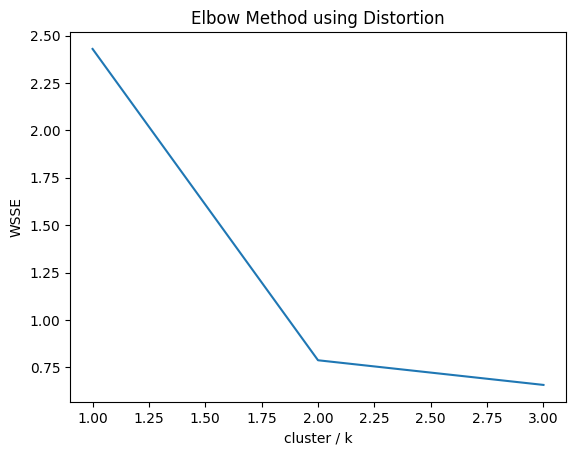

In [267]:
wcss = []
for i in range(1, 11):
    km = Kmeans(n_cluster=i)
    km.fit(df)
    wcss.append(km.inertia)

plt.plot(np.arange(1, 11), wcss)
plt.title("Elbow Method using Distortion")
plt.xlabel("cluster / k")
plt.ylabel("WSSE")